# **Assignment 7**
# **Afnan Madi**

## **Assignment Supervised machine Learning - Regression**

### **_House Price Prediction Using Bolton Housing Data_**
This dataset provides information about house prices in Bolton. House Price Prediction


**In this notebook, you'll follow the basic machine learning process to build a regression model to predict house prices using the "Boston Housing Dataset" from sklearn. The regression model will either be a Decision Tree or Random Forest regressor.**



---



### **Follow the instructions and complete each TODO to complete the assessment on the essential steps in building and evaluating a regression model.**


The following is a description of each column in the dataset:

Dataset Features (Bolton Housing):

* CRIM: Crime rate by town
* ZN: Proportion of residential land zoned for large lots
* INDUS: Proportion of non-retail business acres per town
* CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX: Nitric oxide concentration (parts per 10 million)
* RM: Average number of rooms per dwelling
* AGE: Proportion of owner-occupied units built before 1940
* DIS: Weighted distances to five Boston employment centers
* RAD: Index of accessibility to radial highways
* TAX: Full-value property tax rate per `$10,000`
* PTRATIO: Pupil-teacher ratio by town
* B: Proportion of Black population
* LSTAT: Percentage of lower status of the population
* MEDV (Target): Median value of owner-occupied homes in `$1,000s`



**Dataset is from sklearn Datasets**

# **Imports**

In [4]:
#Import all the necessary libraries for data handling, visualization, and model building.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# **Data Collection and Loading**

In [35]:
#Load the 'Boston Housing' dataset from sklearn and convert it into a pandas DataFrame.
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

In [34]:
# Define feature names #Flatten all the values into a single long list and remove the nulls

columns = [
    'CRIM',
    'ZN',
    'INDUS',
    'CHAS',
    'NOX',
    'RM',
    'AGE',
    'DIS',
    'RAD',
    'TAX',
    'PTRATIO',
    'B',
    'LSTAT',
    'MEDV',
]
values_w_nulls = raw_df.values.flatten()
all_values = values_w_nulls[~np.isnan(values_w_nulls)]

#Reshape the values to have 14 columns and make a new df out of them
df = pd.DataFrame(
    data = all_values.reshape(-1, len(columns)),
    columns = columns,
)

df
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
           'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT','MEDV']


In [37]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


# **Quick Check of Data**

In [38]:
# Display the first few rows of the dataset to understand its structure
data.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,NaN
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,NaN
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,NaN
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,NaN
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,NaN


In [39]:
# Check the features and target variable
data.info()
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     0 non-null      float64
dtypes: float64(14)
memory usage: 55.5 KB


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,0.0
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,NaN
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,NaN
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,NaN
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,NaN
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,NaN
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,NaN
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,NaN


# **EDA and Data Preprocessing**

In [40]:
# Check for missing/null values
data.isnull().sum()


,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [44]:
print(data[['RM', 'LSTAT', 'AGE', 'CRIM', 'MEDV']].head())
print(data.dtypes)


      RM  LSTAT   AGE     CRIM  MEDV
0  6.575   4.98  65.2  0.00632   NaN
1  6.421   9.14  78.9  0.02731   NaN
2  7.185   4.03  61.1  0.02729   NaN
3  6.998   2.94  45.8  0.03237   NaN
4  7.147   5.33  54.2  0.06905   NaN
CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


In [45]:
target = raw_df.iloc[1::2, 2].astype(float).values


In [46]:
data['MEDV'] = target


In [47]:
print(data[['RM', 'LSTAT', 'AGE', 'CRIM', 'MEDV']].head())
print(data.dtypes)


      RM  LSTAT   AGE     CRIM  MEDV
0  6.575   4.98  65.2  0.00632  24.0
1  6.421   9.14  78.9  0.02731  21.6
2  7.185   4.03  61.1  0.02729  34.7
3  6.998   2.94  45.8  0.03237  33.4
4  7.147   5.33  54.2  0.06905  36.2
CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


In [48]:
data['MEDV'] = data['MEDV'].astype(float)


In [49]:
print(data.dtypes['MEDV'])


float64


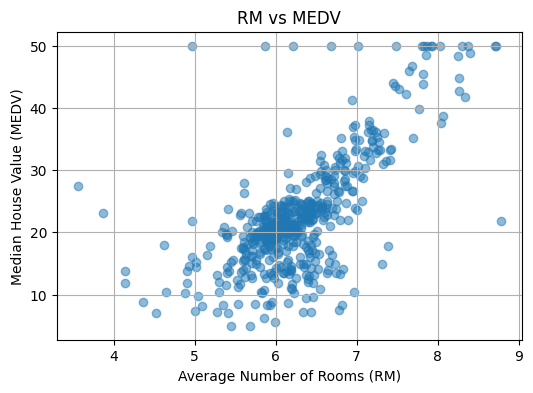

In [53]:
# Visualize the data: example with RM vs MEDV
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.scatter(data['RM'], data['MEDV'], alpha=0.5)
plt.xlabel('Average Number of Rooms (RM)')
plt.ylabel('Median House Value (MEDV)')
plt.title('RM vs MEDV')
plt.grid(True)
plt.show()


In [54]:
# Create a function to automate scatter plots for all features vs the target variable
def plot_features_vs_target(df, features, target='MEDV'):
    for feature in features:
        plt.figure(figsize=(6, 4))
        plt.scatter(df[feature], df[target], alpha=0.5)
        plt.xlabel(feature)
        plt.ylabel(target)
        plt.title(f'{feature} vs {target}')
        plt.grid(True)
        plt.show()


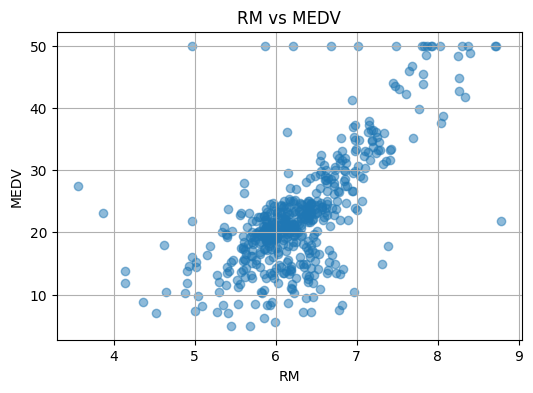

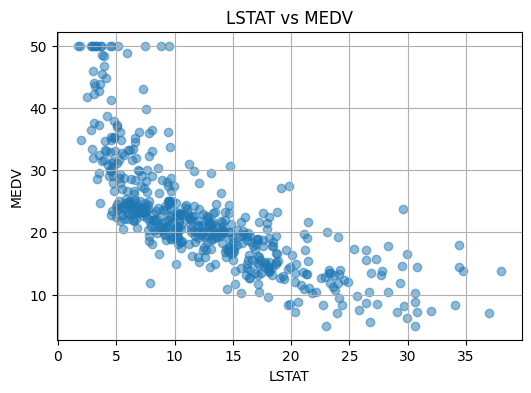

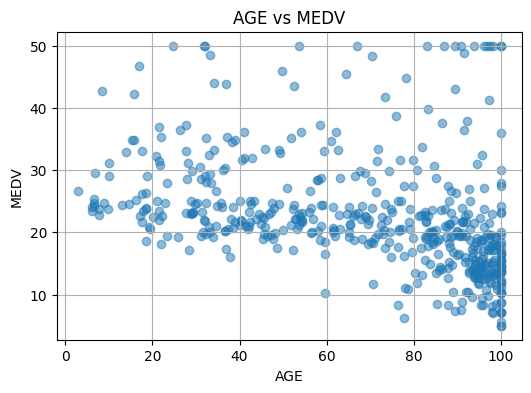

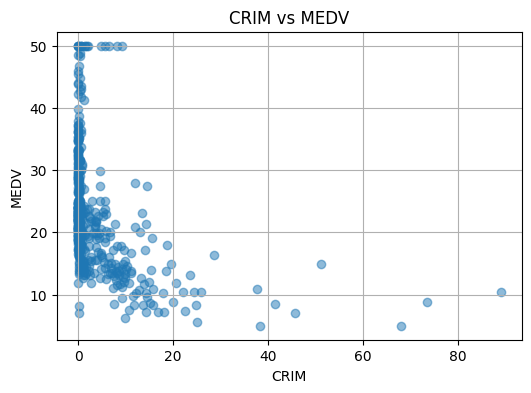

In [52]:
# Use the function to visualize the relationships between multiple features and the target variable
plot_features_vs_target(data, ['RM', 'LSTAT', 'AGE', 'CRIM'])


# **ML Model Training**

In [55]:
#Split the Dataset

from sklearn.model_selection import train_test_split

# Features and target
X = data.drop('MEDV', axis=1)
y = data['MEDV']

# 80% train, 20% test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
#Choose the Model (Random Forest)

from sklearn.ensemble import RandomForestRegressor

# Initialize the model
model = RandomForestRegressor(random_state=42)

In [57]:
#Train the Model

# Fit the model to the training data
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# **Model Evaluation**

In [58]:
#Evaluate Model Performance

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predict using the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared Score (R²): {r2:.2f}")

Root Mean Squared Error (RMSE): 2.81
R-squared Score (R²): 0.89


# **Model Prediction**

In [59]:
# Create a new sample with made-up values
new_data = pd.DataFrame([{
    'CRIM': 0.2,
    'ZN': 12.5,
    'INDUS': 7.07,
    'CHAS': 0,
    'NOX': 0.5,
    'RM': 6.5,
    'AGE': 68.0,
    'DIS': 4.0,
    'RAD': 2,
    'TAX': 250,
    'PTRATIO': 17.0,
    'B': 400.0,
    'LSTAT': 12.0
}])

# Predict the price
predicted_price = model.predict(new_data)

# Show the result
print(f"Predicted Median House Value: ${predicted_price[0] * 1000:.2f}")


Predicted Median House Value: $22189.00
